**Modern Portfolio Theory (MPT)**

In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd
import re

In [3]:
# From universe of stocks, categorize by beta(SPY,Xi) and Corr(SPY,Xi)
list_tickers = ['SPY', 'AAPL', 'LMT', 'XOM', 'KO', 'MRK', 'TSM', 'TSLA', 'NFLX']

In [4]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_2yrs_ago = pd.to_datetime(date_today) - pd.DateOffset(months=25)
date_2yrs_ago = date_2yrs_ago.strftime("%Y-%m-%d")
date_2yrs_ago

'2021-12-03'

In [5]:
portfolio = Engine(
    start_date = date_2yrs_ago,                                      
    portfolio = list_tickers,
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "monthly"
)

Start date: 2021-12-03
End date: 2024-01-03


,Backtest
,
Annual return,13.12%
Cumulative return,29.02%
Annual volatility,18.08 %
Winning day ratio,52.02%
Sharpe ratio,0.77
Calmar ratio,0.79
Information ratio,0.0
Stability,0.68
Max Drawdown,-16.53 %


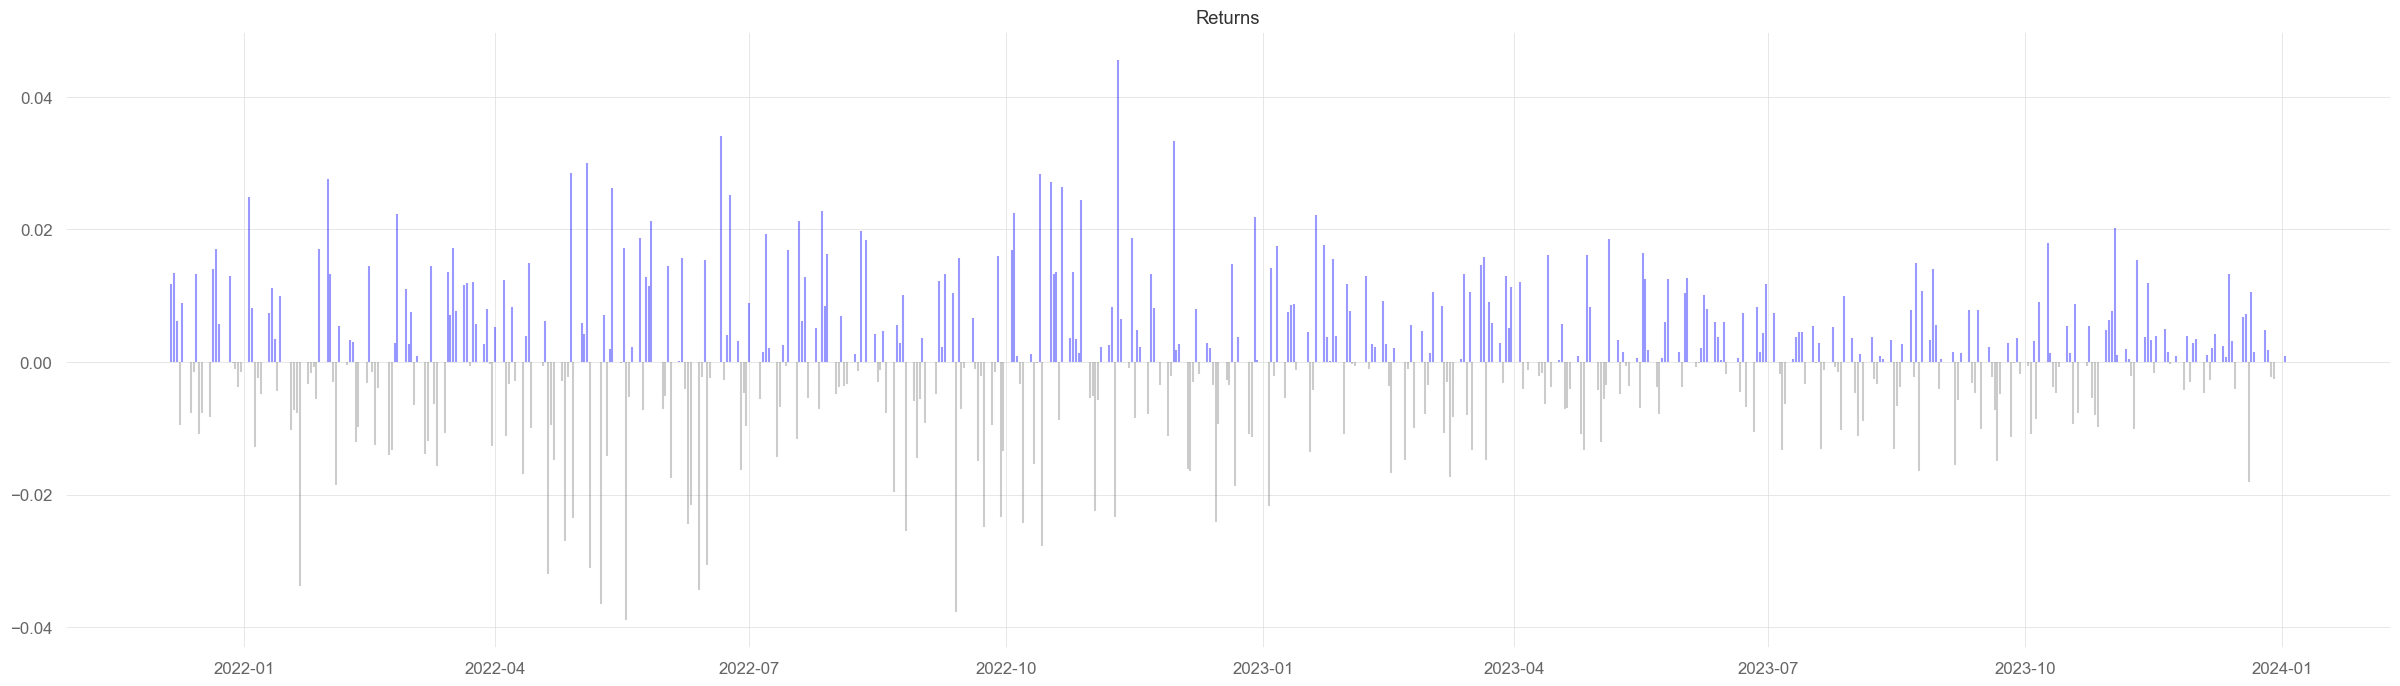

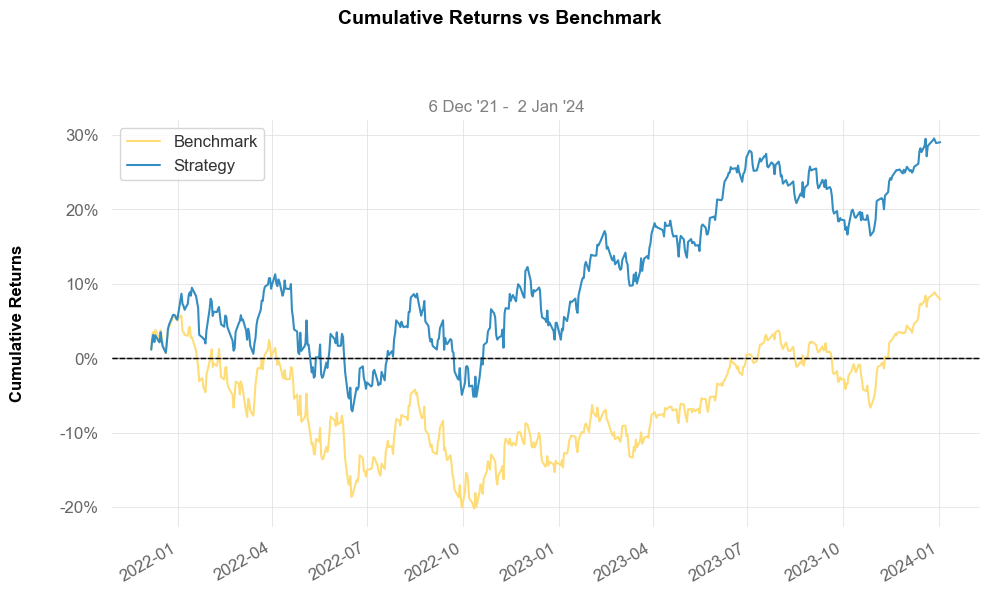

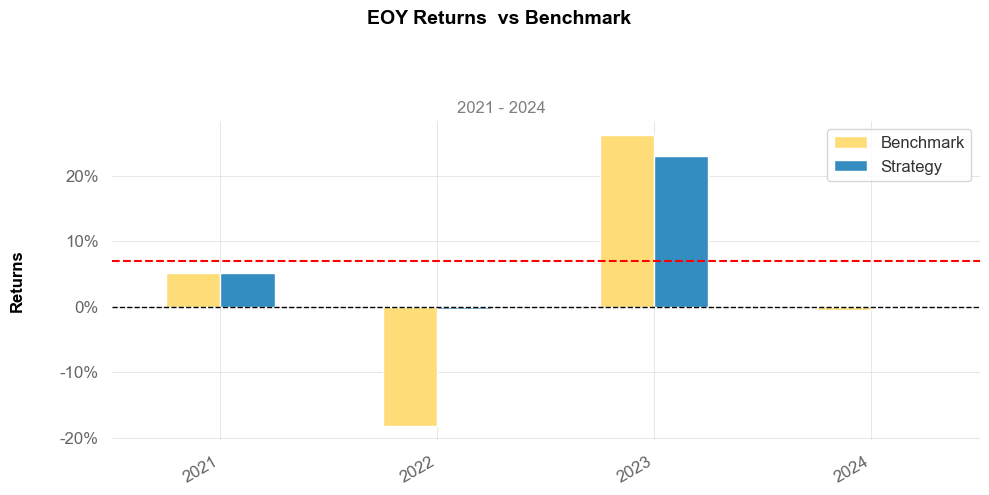

In [6]:
try:
    empyrial(portfolio)
except TypeError as e:
    pass 

# Summary of allocations

In [7]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2022-01-02,2022-02-01,2022-03-04,2022-04-03,2022-05-04,2022-06-03,2022-07-03,2022-08-03,2022-09-02,2022-10-03,...,2023-05-04,2023-06-03,2023-07-03,2023-08-03,2023-09-02,2023-10-03,2023-11-02,2023-12-03,2024-01-02,2024-01-03
SPY,0.11307,0.11926,0.11733,0.11608,0.11696,0.11743,0.11721,0.11694,0.11632,0.11620,...,0.11634,0.11622,0.11616,0.11619,0.11615,0.11607,0.11602,0.11589,0.11582,0.11582
AAPL,0.09913,0.10831,0.10844,0.10630,0.10693,0.10271,0.10229,0.10307,0.10312,0.10265,...,0.10202,0.10238,0.10278,0.10338,0.10343,0.10349,0.10407,0.10438,0.10481,0.10481
LMT,0.12585,0.13377,0.13219,0.13232,0.13436,0.13956,0.13981,0.13916,0.13775,0.13751,...,0.13487,0.13424,0.13366,0.13318,0.13289,0.13199,0.13096,0.13052,0.13016,0.13016
XOM,0.11653,0.12192,0.12338,0.12900,0.12802,0.12845,0.12513,0.12389,0.12435,0.12331,...,0.12146,0.12118,0.12141,0.12124,0.12131,0.12135,0.12110,0.12099,0.12075,0.12075
KO,0.12636,0.13209,0.13295,0.13109,0.13327,0.13493,0.13767,0.13820,0.13661,0.13635,...,0.13543,0.13496,0.13433,0.13385,0.13345,0.13291,0.13219,0.13168,0.13114,0.13114
MRK,0.13341,0.13688,0.13216,0.13259,0.13274,0.14185,0.14185,0.14261,0.14110,0.14143,...,0.14039,0.13996,0.13893,0.13825,0.13717,0.13655,0.13635,0.13580,0.13512,0.13512
TSM,0.10226,0.09926,0.10289,0.10184,0.10375,0.10482,0.10676,0.10510,0.10546,0.10647,...,0.10512,0.10468,0.10481,0.10480,0.10519,0.10523,0.10521,0.10511,0.10508,0.10508
TSLA,0.07221,0.06989,0.06855,0.06903,0.07417,0.06272,0.06002,0.06133,0.06425,0.06536,...,0.06819,0.06917,0.06962,0.07020,0.07078,0.07165,0.07288,0.07346,0.07424,0.07424
NFLX,0.11118,0.07863,0.08210,0.08174,0.06981,0.06753,0.06927,0.06970,0.07105,0.07071,...,0.07619,0.07721,0.07829,0.07893,0.07963,0.08076,0.08122,0.08217,0.08288,0.08288


In [8]:
print("Summary of the portfolio at the most recent date:") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

Summary of the portfolio at the most recent date:


,2024-01-03
SPY,0.11582
AAPL,0.10481
LMT,0.13016
XOM,0.12075
KO,0.13114
MRK,0.13512
TSM,0.10508
TSLA,0.07424
NFLX,0.08288
